In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
total_asi_df_yearly = pd.read_csv(r"C:\Users\siren\Desktop\AŞI\forecast\dataset\predict_vaccine_yearly.csv", index_col="Index")
total_asi_df_yearly.index = range(2013,2027)

In [3]:
def asi_forecast_plot(select_city):
    ankara_asi_df = total_asi_df_yearly.loc[:, [col for col in total_asi_df_yearly.columns if col.startswith(select_city)]]
    ankara_asi_df.columns = ankara_asi_df.columns.str.replace(select_city+"_", '')
    asi_name = ankara_asi_df.columns.to_list()
    fig, axes = plt.subplots(nrows=len(ankara_asi_df.columns), ncols=1, figsize=(10, 25), sharex=True)
    highlight_years = [2024,2025,2026]
    highlight_color = 'magenta'

    for ax, column in zip(axes, ankara_asi_df.columns):
        ax.plot(ankara_asi_df.index, ankara_asi_df[column], label=f'{column} - Historical', marker='o')
        
        predicted_data = ankara_asi_df.loc[highlight_years, column]
        ax.plot(predicted_data, linestyle='--', color=highlight_color, marker='o', markersize=10, label='Predicted')
        
        for year, value in predicted_data.items():
            ax.annotate(value, (year, value), textcoords="offset points", xytext=(0,10), ha='center')
        
        ax.set_title(column)
        ax.grid(True)
        ax.legend(loc='upper right')

    fig.suptitle(f'{select_city} Childhood Vaccination Numbers Forecast', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])  
    plt.xlabel('Year')
    plt.show()




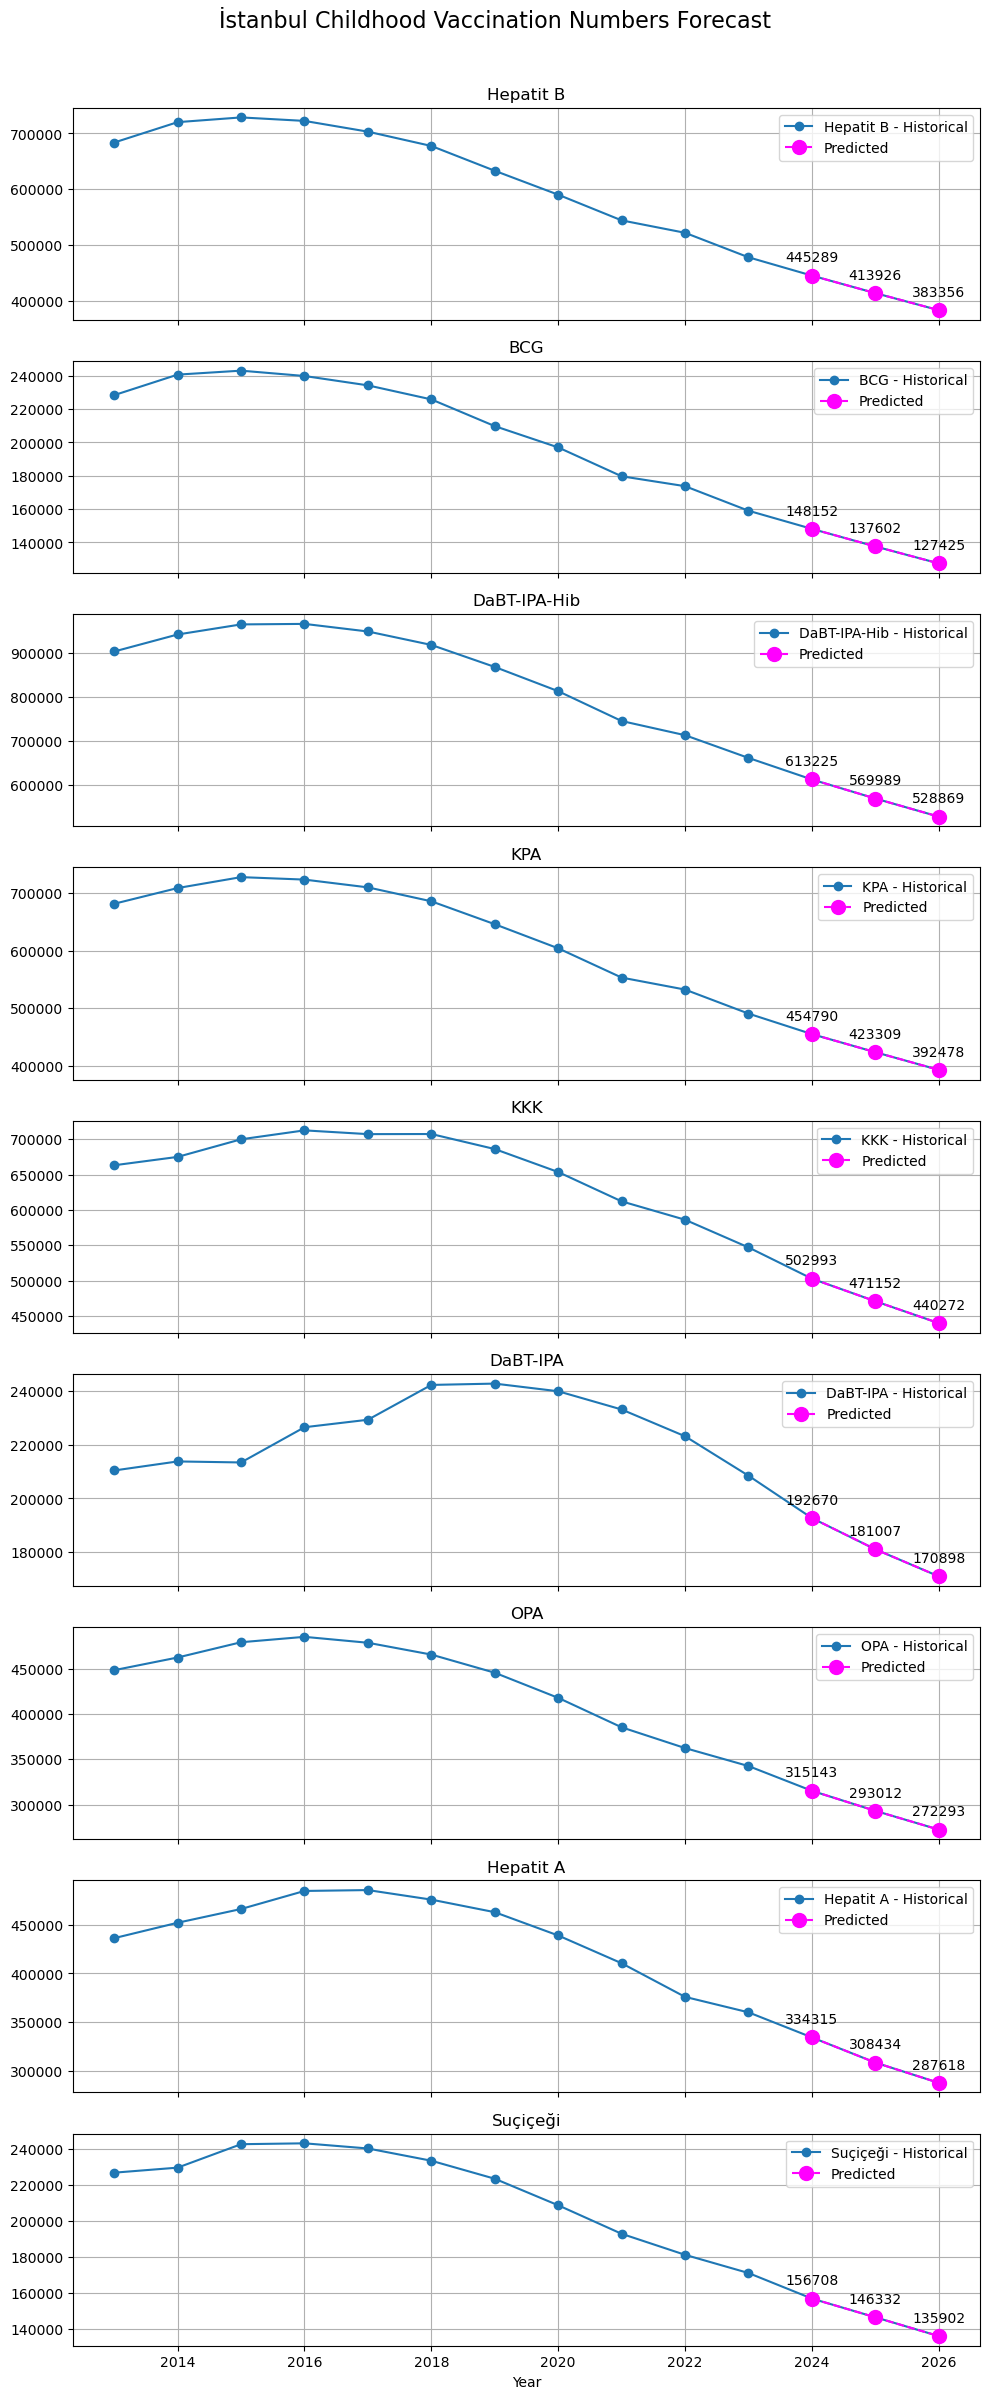

In [4]:
select_city = 'İstanbul'
asi_forecast_plot(select_city)

In [5]:
asi_name = ['Hepatit B','BCG','DaBT-IPA-Hib','KPA','KKK','DaBT-IPA','OPA','Hepatit A','Suçiçeği']

C:\Users\siren\AppData\Local\Temp\ipykernel_28728\2761141233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.rename(columns={"NAME_1":"Province"},inplace=True)
C:\Users\siren\AppData\Local\Temp\ipykernel_28728\2761141233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.replace("K. Maras","Kahramanmaraş",inplace=True)
C:\Users\siren\AppData\Local\Temp\ipykernel_28728\2761141233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

<Axes: >

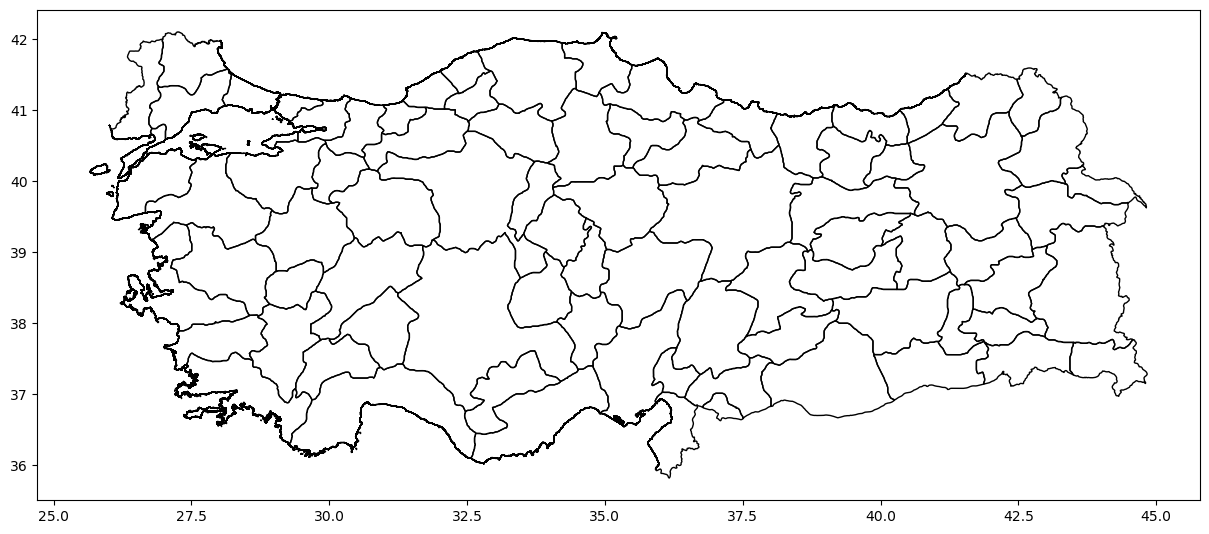

In [17]:
turkey_geo = gpd.read_file('dataset/map/TUR_adm1.shp')

turkey = turkey_geo[["NAME_1","geometry"]]
turkey.rename(columns={"NAME_1":"Province"},inplace=True)
turkey.replace("K. Maras","Kahramanmaraş",inplace=True)
turkey.replace('Çankiri', 'Çankırı',inplace=True)
turkey.replace('Adiyaman', 'Adıyaman',inplace=True)
turkey.replace('Agri', 'Ağrı',inplace=True)
turkey.replace('Aydin', 'Aydın',inplace=True)
turkey.replace('Balikesir', 'Balıkesir',inplace=True)
turkey.replace('Diyarbakir', 'Diyarbakır',inplace=True)
turkey.replace('Eskisehir', 'Eskişehir',inplace=True)
turkey.replace('Gümüshane', 'Gümüşhane',inplace=True)
turkey.replace('Istanbul', 'İstanbul',inplace=True)
turkey.replace('Izmir', 'İzmir',inplace=True)
turkey.replace('Kinkkale', 'Kırıkkale',inplace=True)
turkey.replace('Kirklareli', 'Kırklareli',inplace=True)
turkey.replace('Kirsehir', 'Kırşehir',inplace=True)
turkey.replace('Mugla', 'Muğla',inplace=True)
turkey.replace('Mus', 'Muş',inplace=True)
turkey.replace('Nevsehir', 'Nevşehir',inplace=True)
turkey.replace('Sanliurfa', 'Şanlıurfa',inplace=True)
turkey.replace('Sirnak', 'Şırnak',inplace=True)
turkey.replace('Tekirdag', 'Tekirdağ',inplace=True)
turkey.replace('Usak', 'Uşak',inplace=True)
turkey.replace('Zinguldak', 'Zonguldak',inplace=True)
turkey.replace('Afyon', 'Afyonkarahisar',inplace=True)
turkey.replace('Nigde', 'Niğde',inplace=True)

turkey.sort_index(inplace=True)

turkey.plot(figsize=(15,15),edgecolor="k",facecolor="none")

In [18]:
turkey

,Province,geometry
0,Çanakkale,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,Çankırı,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,Çorum,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,Adana,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."
...,...,...
76,Uşak,"POLYGON ((29.89273 38.77788, 29.89274 38.73051..."
77,Van,"POLYGON ((43.34184 39.39789, 43.35878 39.38728..."
78,Yalova,"POLYGON ((29.39486 40.70208, 29.39486 40.70181..."
79,Yozgat,"POLYGON ((35.34320 40.21666, 35.35103 40.20958..."


In [128]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd

asi_name = "Hepatit B"

def asi_map_plot(asi_name):
    df_single_asi = total_asi_df_yearly.loc[:, [col for col in total_asi_df_yearly.columns if col.endswith(asi_name)]]
    df_single_asi.columns = df_single_asi.columns.str.replace("_"+asi_name, '')
    
    for year in [2024, 2025, 2026]:
        asi_df = df_single_asi.loc[[year]].transpose().reset_index().rename(columns = {"index": "Province", year: f"Number of {asi_name} Vaccine"})
        map_df = turkey.merge(asi_df, on="Province")
        
        fig, ax = plt.subplots(figsize=(20, 8))
        ax.set_title(f"Number of {asi_name} Vaccine Forecast In Turkey {year}", size=20)
        map_df.plot(column=f"Number of {asi_name} Vaccine", legend=False, cmap="Reds", ax=ax)
        
        norm = colors.Normalize(vmin=map_df[f"Number of {asi_name} Vaccine"].min(), vmax=map_df[f"Number of {asi_name} Vaccine"].max())
        cbar = plt.cm.ScalarMappable(norm=norm, cmap="Reds")
        ax_cbar = fig.colorbar(cbar, ax=ax)
        ax_cbar.set_label(f"# Vaccine")
        
        for idx, row in map_df.iterrows():
            centroid_x, centroid_y = row['geometry'].centroid.x, row['geometry'].centroid.y
            
            if row['Province'] == "İstanbul":
                ax.text(centroid_x +.4, centroid_y + .3, f"{row['Province']}\n{row[f'Number of {asi_name} Vaccine']}",
                        verticalalignment='center', horizontalalignment='center', fontsize=8, color='Black', style='italic')
            else:
                ax.text(centroid_x, centroid_y, f"{row['Province']}\n{row[f'Number of {asi_name} Vaccine']}",
                        verticalalignment='center', horizontalalignment='center', fontsize=8, color='Black', style='italic')
        
    plt.show()




c:\Users\siren\anaconda3\envs\tubitak\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\siren\anaconda3\envs\tubitak\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\siren\anaconda3\envs\tubitak\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


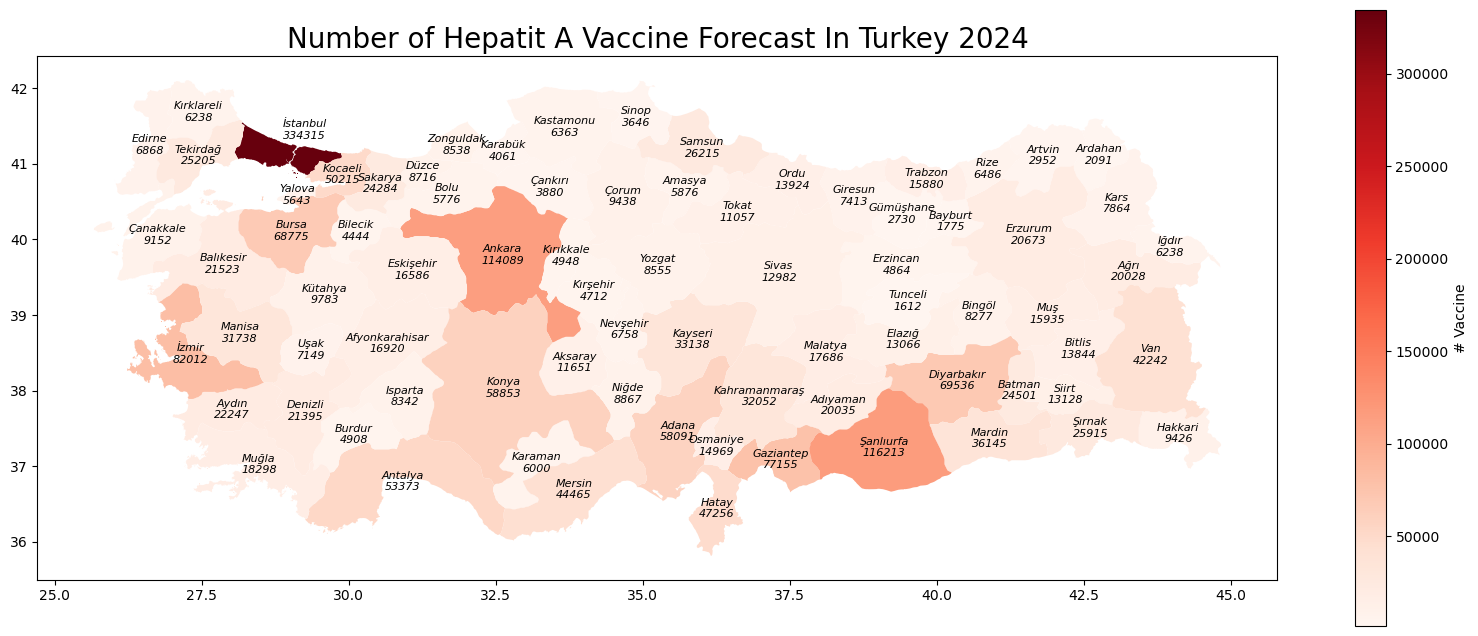

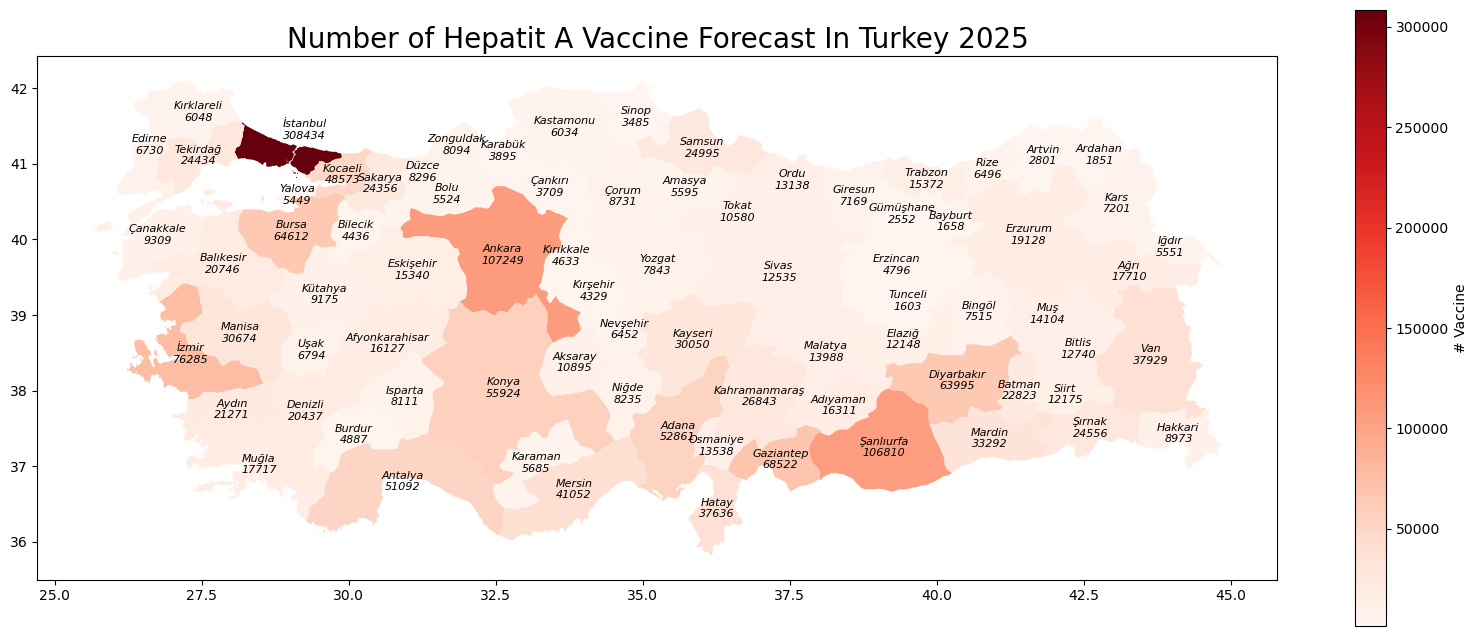

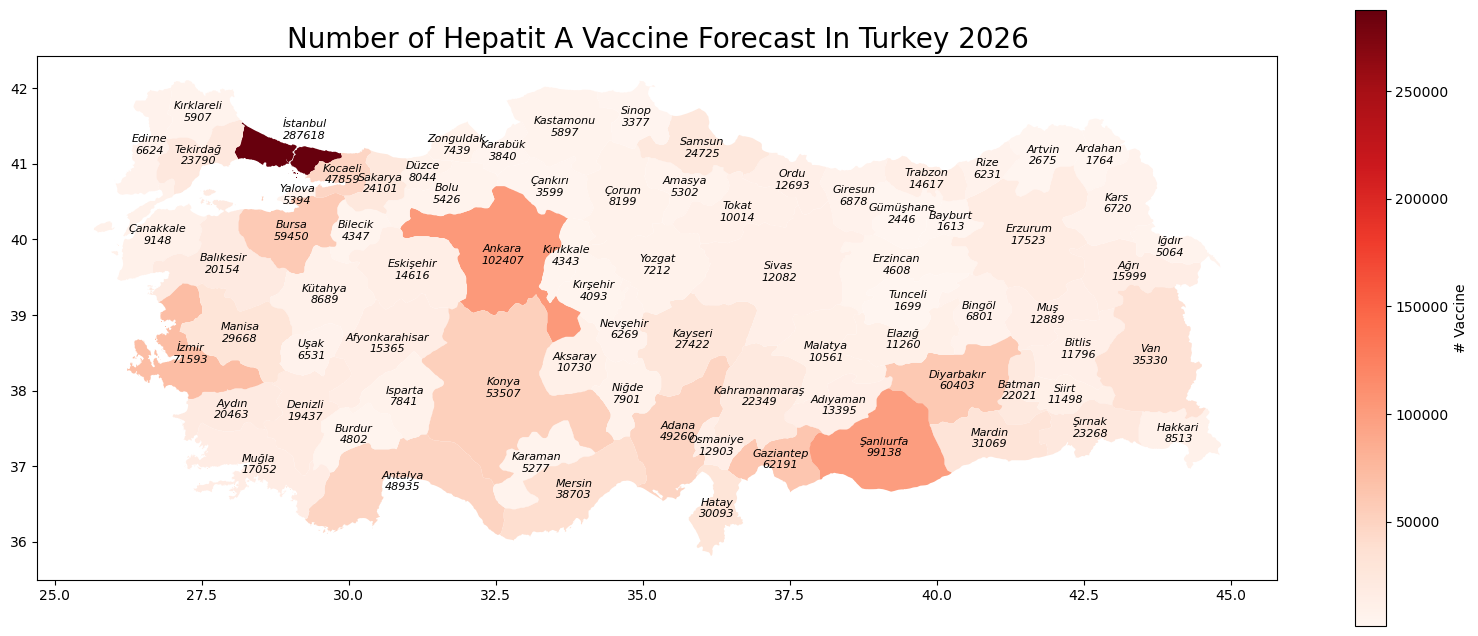

In [129]:
asi_map_plot("Hepatit A")

In [107]:
map_df[map_df["Province"] == "İstanbul"].centroid.y

C:\Users\siren\AppData\Local\Temp\ipykernel_28728\118237866.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_df[map_df["Province"] == "İstanbul"].centroid.y


38    41.148955
dtype: float64